In [1]:

!pip install deepface

import io # Input/Output Module
import os # OS interfaces
import cv2 # OpenCV package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import statistics
import warnings

from urllib import request # module for opening HTTP requests
from matplotlib import pyplot as plt # Plotting library

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import statistics
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist

import sklearn
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from deepface import DeepFace
from operator import itemgetter
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

  Using cached deepface-0.0.79-py3-none-any.whl (49 kB)
  Using cached fire-0.5.0.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:02
  Using cached retina_face-0.0.13-py3-none-any.whl (16 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
  Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 7.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 7.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 6.8 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 8.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=2db847624d714777206a02c4a7a86e63c671675f979be213d63140f8e8d090bf
  Stored in directory: /home/mario/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439678 sha256=351d11d32bfe157e14c96a93d46d8f59159122c11f7a31c5f569ebb45e4fe3a7
  Stored in directory: /home/mario/.cache/pip/wheels/05/94/dc/81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built fire jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependen

2023-04-14 15:44:25.584430: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 15:44:25.620244: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 15:44:25.621171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 15:44:26.232003: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 0. Data loading & Preprocessing

## 0.1. Loading data
The training set is many times smaller than the test set and this might strike you as odd, however, this is close to a real world scenario where your system might be put through daily use!

In [3]:
# Input data files are available in the read-only "../input/" directory

train = pd.read_csv(
    'data/train_set.csv', index_col = 0)
train.index = train.index.rename('id')

test = pd.read_csv(
    'data/test_set.csv', index_col = 0)
test.index = test.index.rename('id')

# read the images as numpy arrays and store in "img" column
train['img'] = [cv2.cvtColor(np.load('data/train/train_{}.npy'.format(index), allow_pickle=False), cv2.COLOR_BGR2RGB) 
                for index, row in train.iterrows()]

test['img'] = [cv2.cvtColor(np.load('data/test/test_{}.npy'.format(index), allow_pickle=False), cv2.COLOR_BGR2RGB) 
                for index, row in test.iterrows()]
  

train_size, test_size = len(train),len(test)

"The training set contains {} examples, the test set contains {} examples.".format(train_size, test_size)

'The training set contains 80 examples, the test set contains 1816 examples.'

*Note: this dataset is a subset of the* [*VGG face dataset*](https://www.robots.ox.ac.uk/~vgg/data/vgg_face/).

## 0.2. A first look
Let's have a look at the data columns and class distribution.

In [4]:
# The training set contains an identifier, name, image information and class label
train.head(1)

name  class                                                img
id                                                                      
0   Mila_Kunis      2  [[[50, 31, 25], [49, 30, 24], [49, 30, 24], [4...

In [5]:
# The test set only contains an identifier and corresponding image information.

test.head(1)

img
id                                                   
0   [[[209, 210, 205], [208, 209, 204], [208, 209,...

In [6]:
# The class distribution in the training set:
train.groupby('name').agg({'img':'count', 'class': 'max'})

img  class
name                       
Jesse_Eisenberg   30      1
Michael_Cera      10      0
Mila_Kunis        30      2
Sarah_Hyland      10      0

Note that **Jesse is assigned the classification label 1**, and **Mila is assigned the classification label 2**. The dataset also contains 20 images of **look alikes (assigned classification label 0)** and the raw images. 

## 0.3. Preprocess data with DeepFacePreprocessor

We are using [DeepFace library](https://github.com/serengil/deepface) to detect and extract faces from the pictures. We can use different models for this task. We decided to use ssd model for it's speed and in cases it does not recognize a face, we are using better but slower model - retinaface.

In some cases there are multiple faces present on one picture, sometimes from 2 different classes. For training data we manually select the correct one, in other cases we take the first detected face.

In [7]:
class DeepFacePreprocessor():
    """Preprocessing pipeline built around DeepFace face detector. """
    
    def __init__(self, backend, face_size):
        self.face_size = face_size
        self.backend = backend
            
    def detect_faces(self, img, backend):
        """Detect all faces in an image."""
        return DeepFace.extract_faces(img, detector_backend = backend, enforce_detection=False, align=False, target_size=self.face_size)
        
    def extract_faces(self, img):
        """Returns 3 most probable faces (cropped) in an image."""
        
        faces = self.detect_faces(img, self.backend)
        faces.sort(key=itemgetter('confidence'), reverse=True)
        # If no faces found, try again with a better backend
        if faces[0]['confidence'] == 0:
            faces = self.detect_faces(img, "retinaface")

        # If still no faces found, return empty list
        if faces[0]['confidence'] == 0:
            return []
        
        #select 3 best matches
        faces = faces[:3]
        #normalize faces
        faces_normalized = [cv2.normalize(face['face'], None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8) for face in faces]
        return [cv2.cvtColor(face, cv2.COLOR_BGR2RGB) for face in faces_normalized]
    
    def preprocess(self, data_row, i, manual_choices=None):
        faces = self.extract_faces(data_row['img'])
        
        # if no faces were found, return None
        if len(faces) == 0:
            nan_img = np.empty(self.face_size + (3,))
            nan_img[:] = np.nan
            return nan_img
        elif len(faces) != 1 and manual_choices is not None and i in manual_choices:
            #if we detect more than 1 face we can select correct one manually
            return faces[manual_choices[i]]
        
        # if we didn't specify a face to choose manualy return the first one
        return faces[0]
        
    def __call__(self, data, manual_choices=None):
        return np.stack([self.preprocess(row, i, manual_choices) for i, row in data.iterrows()]).astype(int)

If you already have pre-processed images, you can uncomment the code below and use them.

In [8]:
# prep_path = '/kaggle/input/cv-ga1-dataset/'
# train_X = np.load(os.path.join(prep_path, 'train_X.npy'))
# train_y = np.load(os.path.join(prep_path, 'train_y.npy'))
# test_X = np.load(os.path.join(prep_path, 'test_X.npy'))

In [9]:
preprocess = True

In [10]:
if preprocess:  
    
    # parameter to play with 
    FACE_SIZE = (150, 150)

    def plot_image_sequence(data, n, imgs_per_row=7):
        n_rows = 1 + int(n/(imgs_per_row+1))
        n_cols = min(imgs_per_row, n)

        f,ax = plt.subplots(n_rows,n_cols, figsize=(10*n_cols,10*n_rows))
        for i in range(n):
            if n == 1:
                ax.imshow(data[i])
            elif n_rows > 1:
                ax[int(i/imgs_per_row),int(i%imgs_per_row)].imshow(data[i])
            else:
                ax[int(i%n)].imshow(data[i])
        plt.show()

    # we are using DeepFacePreprocessor since it has a better performance
    # if data hasn't been preprocessed yet
    prep_path = 'data/prepped_data/'
    if not os.path.exists(prep_path):
        preprocessor = DeepFacePreprocessor("ssd", FACE_SIZE)

        manual_choices = {0: 0, 9: 0, 18: 1, 26: 0, 30: 0, 32: 0, 34: 2, 41: 0, 49:1, 50:0, 52:1, 53:1, 57:0, 59:1, 61:0, 70:0, 73:0, 77:0}
        train_X, train_y = preprocessor(train, manual_choices), train['class'].values
        test_X = preprocessor(test)

        # Filtering imgs that are not faces ONCE
        a = train_y[train_y == 2]
        np.put(a, [24], 0)
        train_y[train_y == 2] = a


2023-04-14 15:46:02.549590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-14 15:46:02.550235: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


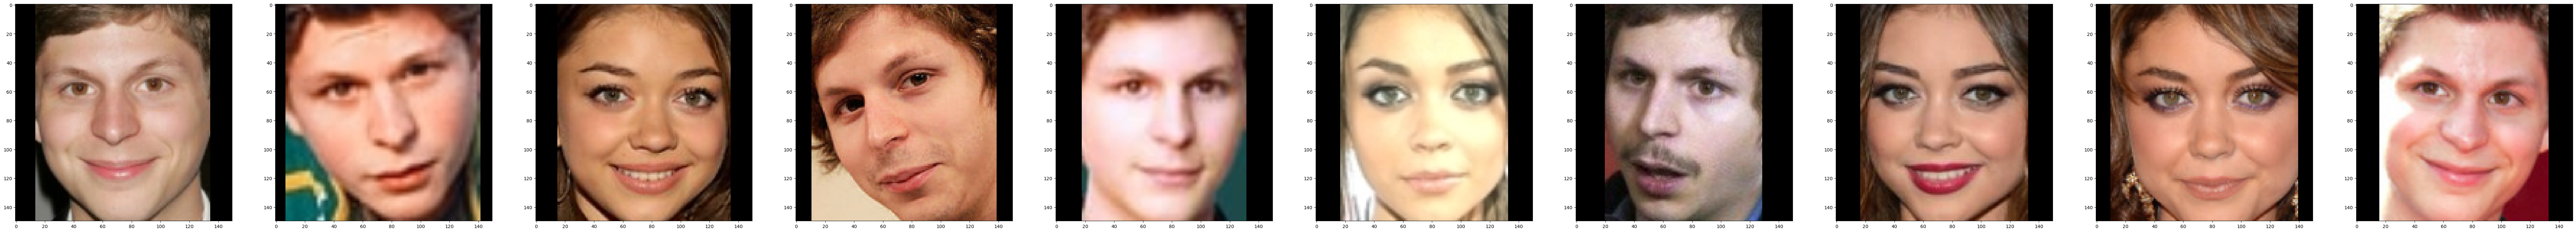

In [11]:
# # plot faces of Michael and Sarah

plot_image_sequence(train_X[train_y == 0], n=10, imgs_per_row=10)

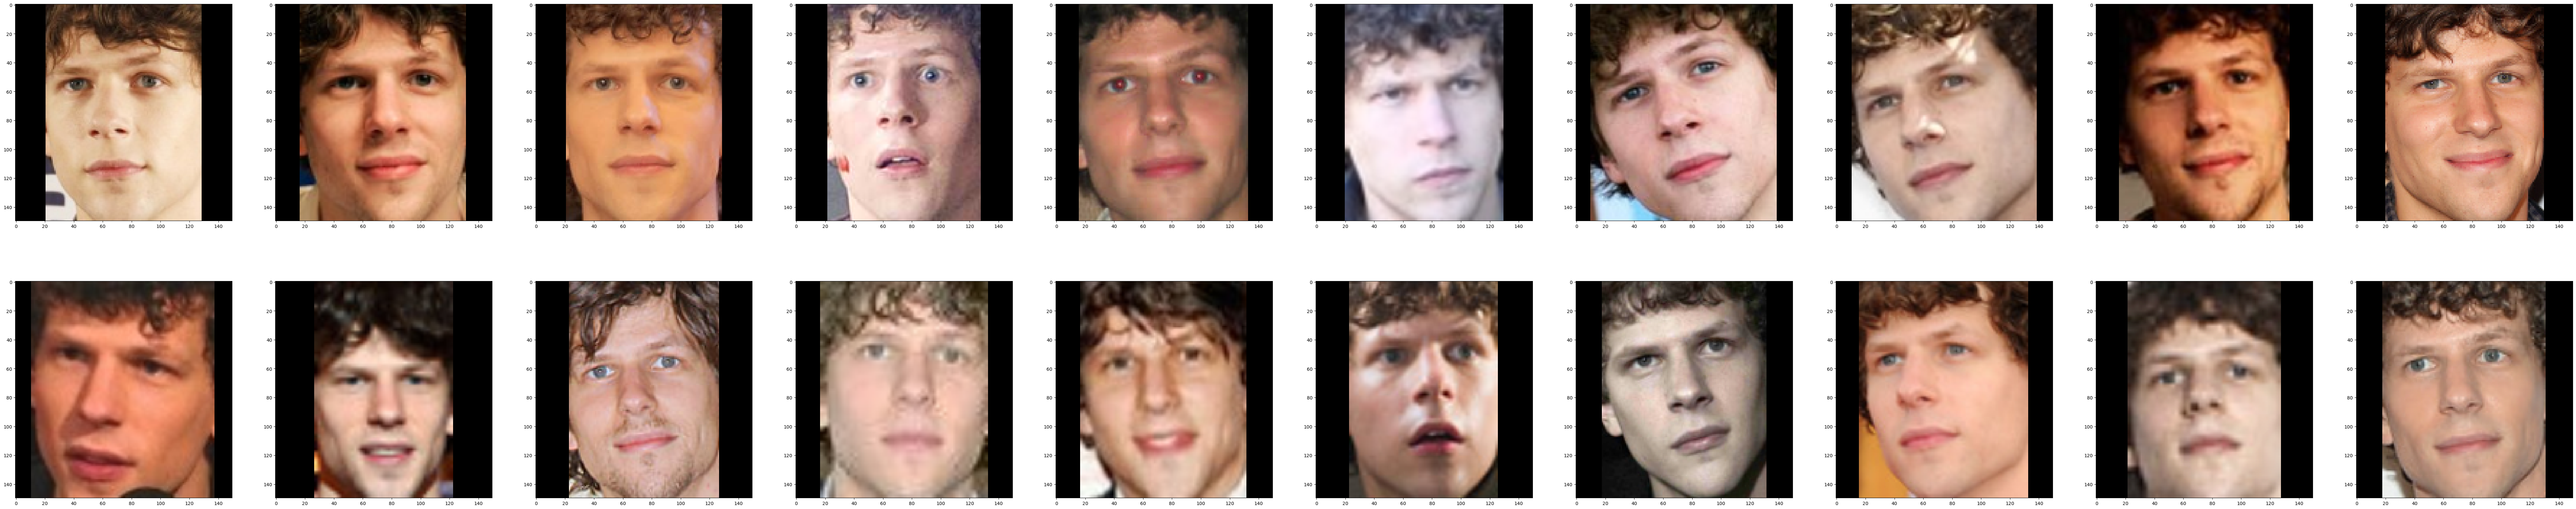

In [12]:
# # plot faces of Jesse


plot_image_sequence(train_X[train_y == 1], n=20, imgs_per_row=10)

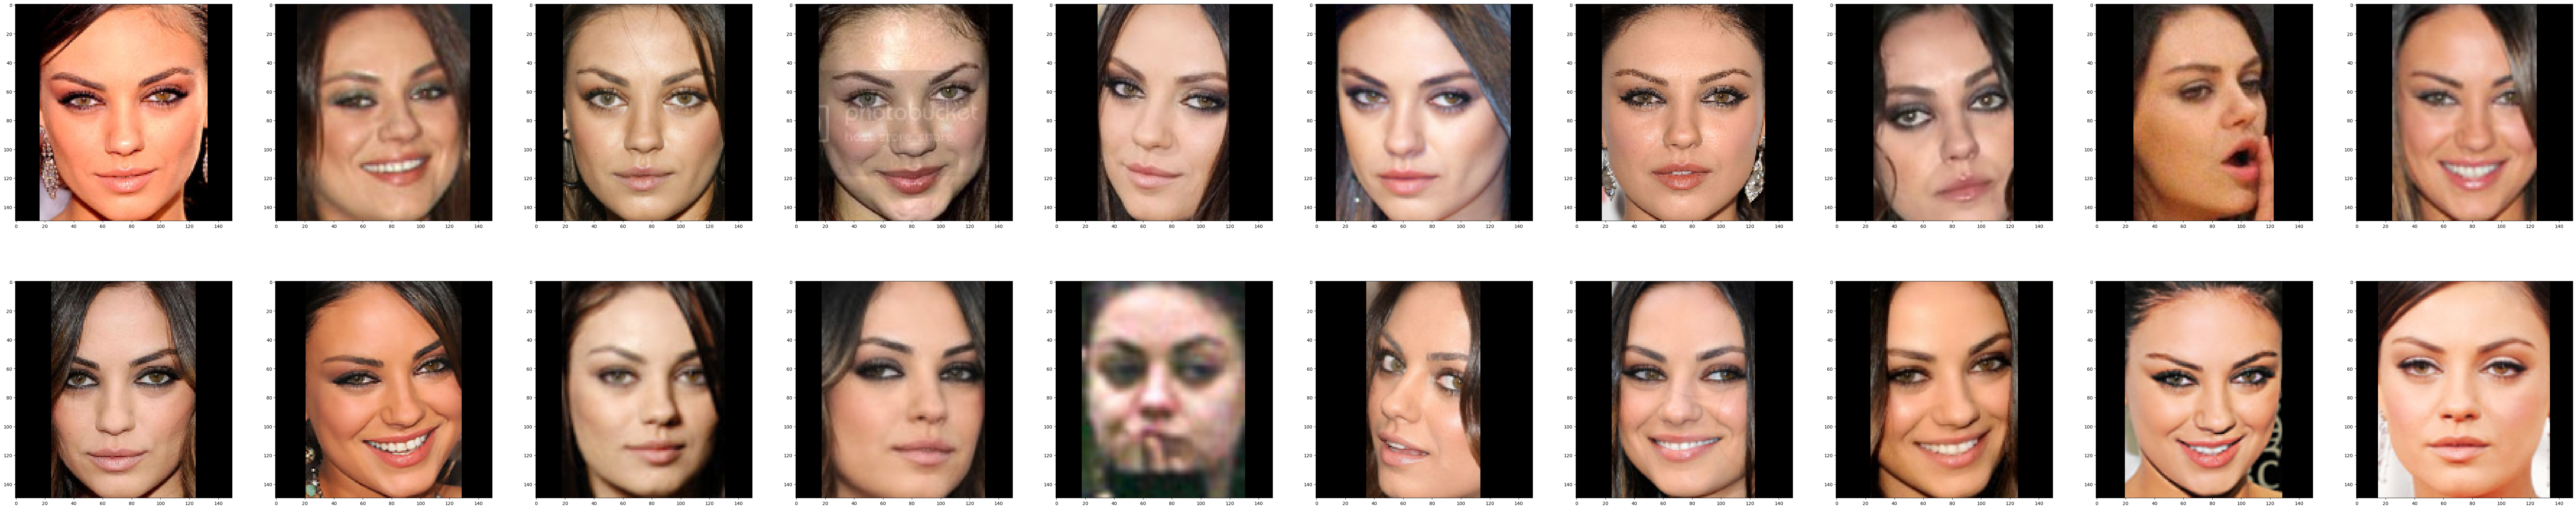

In [13]:
# # plot faces of Mila

plot_image_sequence(train_X[train_y == 2], n=20, imgs_per_row=10)

The code below saves the pre-processed data onto the current session. 

In [13]:
# # save preprocessed data
# prep_path = '/kaggle/working/prepped_data/'
# if not os.path.exists(prep_path):
#     os.mkdir(prep_path)
    
# np.save(os.path.join(prep_path, 'train_X.npy'), train_X)
# np.save(os.path.join(prep_path, 'train_y.npy'), train_y)
# np.save(os.path.join(prep_path, 'test_X.npy'), test_X)

# 1. Feature Representations
## 1.0. Example: Identify feature extractor
Our example feature extractor doesn't actually do anything... It just returns the input:
$$
\forall x : f(x) = x.
$$

It does make for a good placeholder and baseclass ;).

In [14]:
class IdentityFeatureExtractor:
    """A simple function that returns the input"""
    
    def transform(self, X):
        return X
    
    def __call__(self, X):
        return self.transform(X)

## 1.1. Scale Invariant Feature Transform
SIFT is an algorithm that extracts keypoints and computes its descriptors. It is scale and rotation invariant which means we don't have to do any extra preprocessing as it would be needed for HOG which is not rotation invariant.

In [15]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
        
class SIFTFeatureExtractor(IdentityFeatureExtractor):
    
    def __init__(self, **params):
        self.params = params
        self.sift = cv2.SIFT_create(
                            nfeatures =  self.params.get('nfeatures'),
                            nOctaveLayers = self.params.get('nOctaveLayers'),
                            contrastThreshold = self.params.get('contrastThreshold'),
                            edgeThreshold = self.params.get('edgeThreshold'),
                            sigma = self.params.get('sigma') )
        
    def transform(self, X):        
        images_descriptors = []
        for img in X:
            gray = cv2.cvtColor(img.astype(dtype=np.uint8), cv2.COLOR_BGR2GRAY)
            _, descriptors = self.sift.detectAndCompute(gray, None)
            images_descriptors.append(descriptors)
        return np.asarray(images_descriptors)
    
    def flatten(self,image_descriptors):
        # Filter Nones and flattens array to kx128 dimension
        all_descriptors = []
        for descriptors_per_img in image_descriptors:
            if descriptors_per_img is not None:
                for e in descriptors_per_img:
                    all_descriptors.append(e)
        return all_descriptors
    
    def compare_two_img(self, img1, img2):
        img1 = img1.astype(dtype=np.uint8)
        img2 = img2.astype(dtype=np.uint8)
        gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)
        
        keypoints1, descriptors1 = self.sift.detectAndCompute(gray1, None)
        keypoints2, descriptors2 = self.sift.detectAndCompute(gray2, None) 
        
        if descriptors1 is None: 
            return print('Cannot proceed. Img1 has descriptors: None')
        if descriptors2 is None:
            return print('Cannot proceed. Img2 has descriptors: None')

        matches = bf.match(descriptors1,descriptors2)
        matches = sorted(matches, key = lambda x:x.distance)

        img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, outImg = np.empty((1,1)))
        plt.imshow(img_matches)
    
    
    def __call__(self, X):
        return self.transform(X)

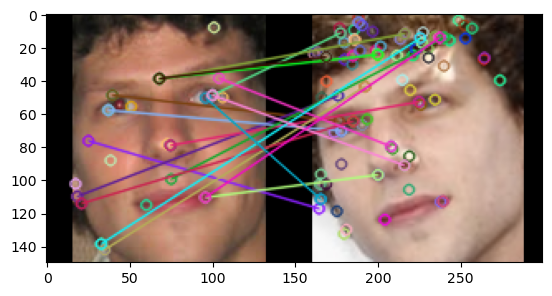

In [16]:
#Create a SIFT extractor with choosen Hyperameters
# sift_extractor = SIFTFeatureExtractor() 
sift_extractor = SIFTFeatureExtractor(
                            nOctaveLayers = 10,
                            contrastThreshold = 0.07,
                            edgeThreshold = 10,
                            sigma = 1.6)

# Plot the matches between two faces
sift_extractor.compare_two_img(train_X[12], train_X[17])

### 1.1.1. t-SNE Plots
t-distributed stochastic neighbor embedding (t-SNE) is a method of visualising high-dimentional data by embedding it into low-dimentional space - usually two- or three-dimentional.

In [17]:
# Defining TSNE with same seed for reproducibility
seed = 42
tsne = TSNE(random_state = seed, perplexity=15) 

# Colours for scatterplot 
palette = sns.color_palette("bright", 3)

# Function for creating a matrix with similarity-based distances between each image
def get_distance_matrix(images_descriptors):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)
    features = []
    for (i, descriptors1) in enumerate(images_descriptors):
        features.append([])
        for (j, descriptors2) in enumerate(images_descriptors):
            if i == j:
                distance = 0
            elif descriptors1 is None or descriptors2 is None:
                distance = 999
            else:
                matches = bf.match(descriptors1, descriptors2)
                distance = statistics.mean([match.distance for match in matches])

            features[i].append(distance)
    return features

<AxesSubplot:xlabel='x', ylabel='y'>

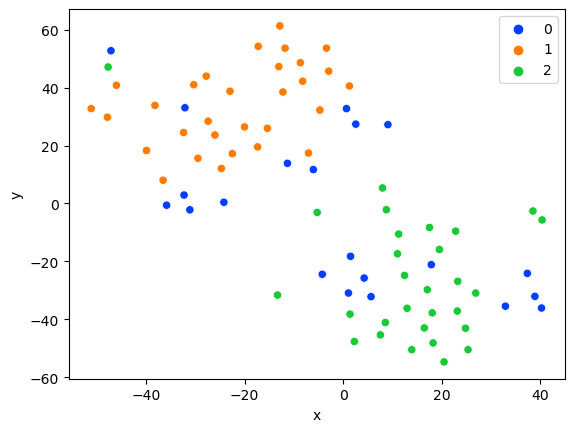

In [24]:
# Defines SIFT extractor with specific hyperparameters
sift_extractor = SIFTFeatureExtractor(
                            nfeatures= None,
                            nOctaveLayers = 4,
                            contrastThreshold = 0.03,
                            edgeThreshold = 20,
                            sigma = 1.8)

# Extracting the features
all_features = sift_extractor.transform(train_X)
all_features = get_distance_matrix(all_features)

# Calculates pairs of instances in the new dimensional space
features_low_dimension = tsne.fit_transform(all_features)
df = pd.DataFrame(features_low_dimension, columns=["x","y"])
# Create a Scatter plot
sns.scatterplot(data=df, x="x", y="y", hue=train_y, legend='full', palette=palette)

### 1.1.2. Discussion
In this section we look how different SIFT hyperparameters affect feature extraction. We show the results on a t-SNE plot.

Later we use the extracted features to train a model.

#### Looking at the effect of SIFT( nOctaveLayers: 3 Default)

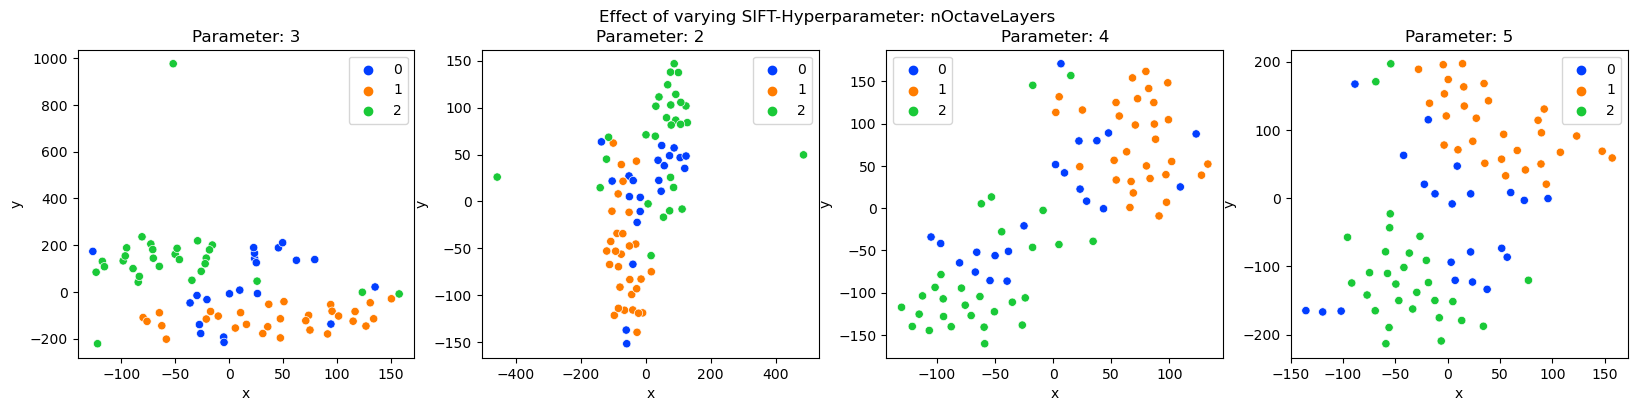

In [25]:
acc_TSNE = []
parameter = [3, 2, 4, 5] 

for i in parameter:
    sift_extractor = SIFTFeatureExtractor(
                            nfeatures = None,
                            nOctaveLayers = i,
                            contrastThreshold = None,
                            edgeThreshold = None,
                            sigma = None)
    
    all_features = sift_extractor(train_X)
    all_features = get_distance_matrix(all_features)
    features_low_dimension = tsne.fit_transform(all_features)
    df = pd.DataFrame(features_low_dimension, columns=["x","y"])
    acc_TSNE.append(df)

# Plotting
f, ax = plt.subplots(1, len(parameter), figsize=(20,4))
f.suptitle('Effect of varying SIFT-Hyperparameter: nOctaveLayers')

for i, df in enumerate(acc_TSNE):
    sns.scatterplot(ax=ax[i], data=df, x="x", y="y", hue=train_y, legend='full', palette=palette)
    ax[i].set_title(f"Parameter: {parameter[i]}")

#### Looking at the effect of SIFT( contrastThreshold = 0.04)
contrastThreshold -> The contrast threshold used to filter out weak features in semi-uniform (low-contrast) regions. 
The larger the threshold, the less features are produced by the detector.

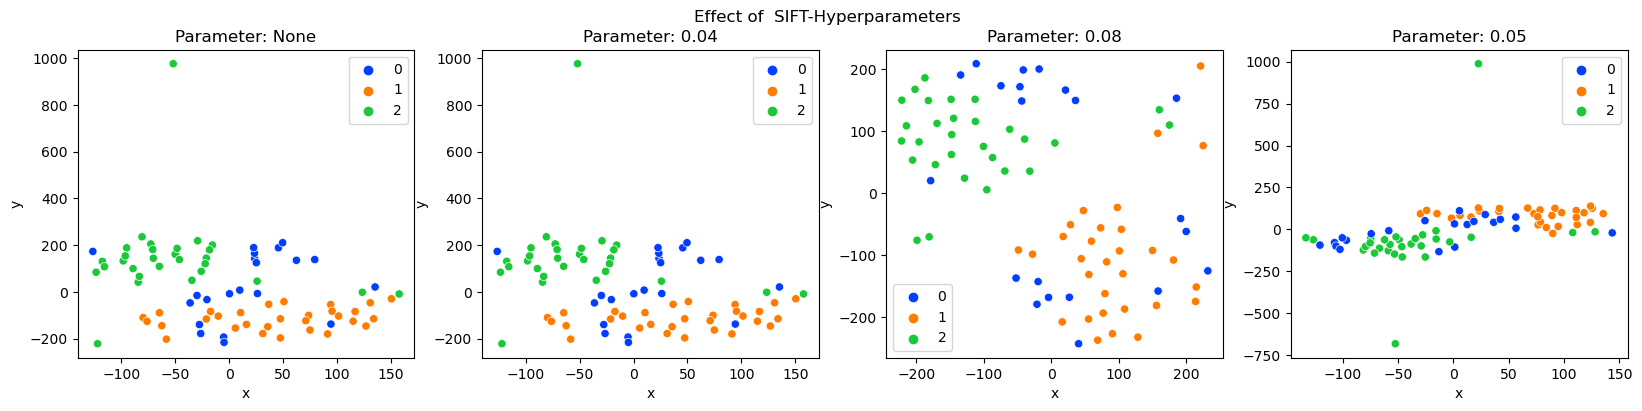

In [26]:
acc_TSNE = []
parameter = [None, 0.04, 0.08, 0.05] 

for i in parameter:
    sift_extractor = SIFTFeatureExtractor(
                            nfeatures = None,
                            nOctaveLayers = None,
                            contrastThreshold = i,
                            edgeThreshold = None,
                            sigma = None)
    
    all_features = sift_extractor(train_X)
    all_features = get_distance_matrix(all_features)
    features_low_dimension = tsne.fit_transform(all_features)
    df = pd.DataFrame(features_low_dimension, columns=["x","y"])
    acc_TSNE.append(df)

# Plotting
f, ax = plt.subplots(1, len(parameter), figsize=(20,4))
f.suptitle('Effect of  SIFT-Hyperparameters')

for i, df in enumerate(acc_TSNE):
    sns.scatterplot(ax=ax[i], data=df, x="x", y="y", hue=train_y, legend='full', palette=palette)
    ax[i].set_title(f"Parameter: {parameter[i]}")

#### Looking at the effect of SIFT( edgeThreshold = 10)
edgeThreshold -> The threshold used to filter out edge-like features.
The larger the edgeThreshold, the less features are filtered out (more features are retained).

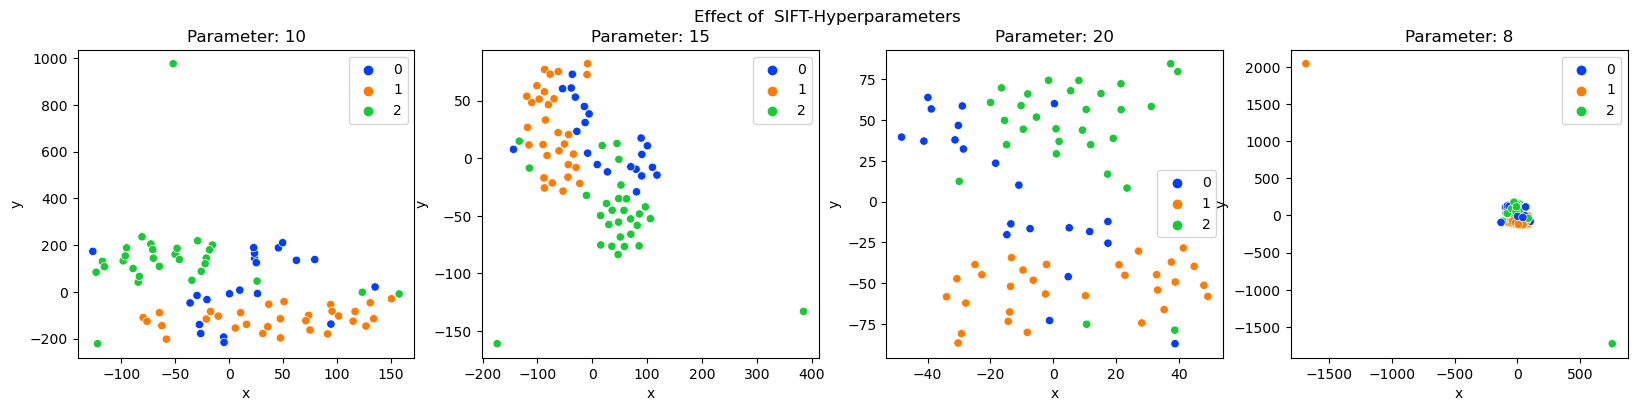

In [27]:
acc_TSNE = []
parameter = [10, 15, 20, 8] 

for i in parameter:
    sift_extractor = SIFTFeatureExtractor(
                            nfeatures = None,
                            nOctaveLayers = None,
                            contrastThreshold = None,
                            edgeThreshold = i,
                            sigma = None)
    
    all_features = sift_extractor(train_X)
    all_features = get_distance_matrix(all_features)
    features_low_dimension = tsne.fit_transform(all_features)
    df = pd.DataFrame(features_low_dimension, columns=["x","y"])
    acc_TSNE.append(df)

# Plotting
f, ax = plt.subplots(1, len(parameter), figsize=(20,4))
f.suptitle('Effect of  SIFT-Hyperparameters')

for i, df in enumerate(acc_TSNE):
    sns.scatterplot(ax=ax[i], data=df, x="x", y="y", hue=train_y, legend='full', palette=palette)
    ax[i].set_title(f"Parameter: {parameter[i]}")

#### Looking at the effect of SIFT( sigma = 1.6)
sigma -> The sigma of the Gaussian applied to the input image at the octave #0. If your image is captured with a weak camera with soft 
lenses, you might want to reduce the number.

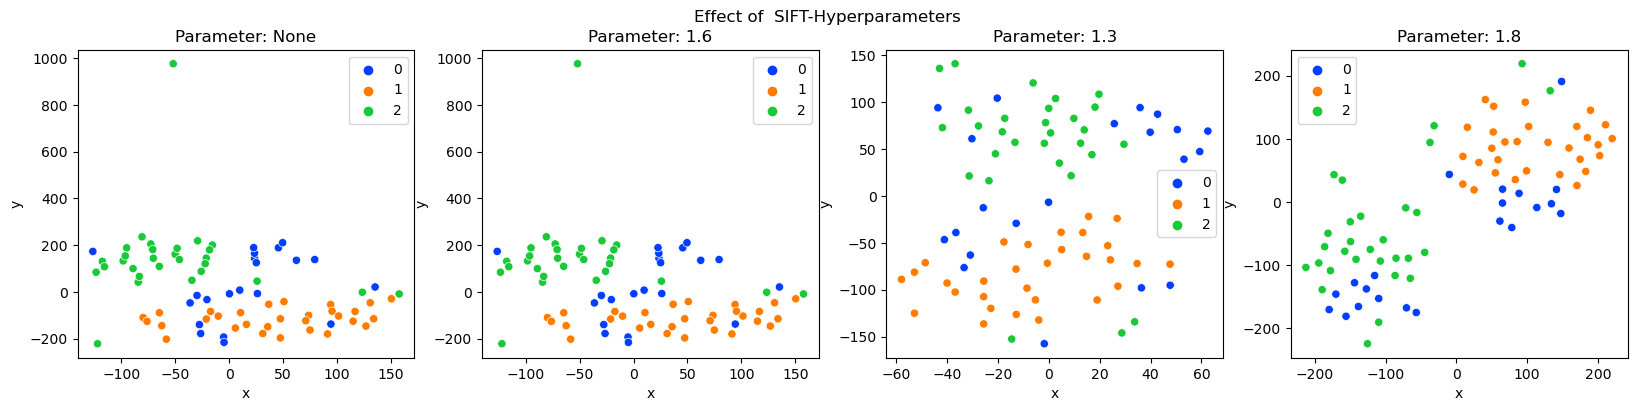

In [28]:
acc_TSNE = []
parameter = [None, 1.6, 1.3, 1.8] 

for i in parameter:
    sift_extractor = SIFTFeatureExtractor(
                            nfeatures = None,
                            nOctaveLayers = None,
                            contrastThreshold = None,
                            edgeThreshold = None,
                            sigma = i)
    
    all_features = sift_extractor(train_X)
    all_features = get_distance_matrix(all_features)
    features_low_dimension = tsne.fit_transform(all_features)
    df = pd.DataFrame(features_low_dimension, columns=["x","y"])
    acc_TSNE.append(df)

# Plotting
f, ax = plt.subplots(1, len(parameter), figsize=(20,4))
f.suptitle('Effect of  SIFT-Hyperparameters')

for i, df in enumerate(acc_TSNE):
    sns.scatterplot(ax=ax[i], data=df, x="x", y="y", hue=train_y, legend='full', palette=palette)
    ax[i].set_title(f"Parameter: {parameter[i]}")


## 1.2. Baseline 2: PCA feature extractor
Below our implementation of PCA can be observed.

In [29]:
class PCAFeatureExtractor(IdentityFeatureExtractor):
    
    def __init__(self, n_components, data):
        self.n_components = n_components      
        self.data = self.preprocess_data(data)
        self.mean = np.mean(self.data, axis=0)
        self.singular, self.eigenfaces = self.compute_vectors()
        
    def svd_flip(self, u, v, u_based_decision=True): 
        """Source : Scikit-Learn documentation"""
        if u_based_decision:
            # columns of u, rows of v
            max_abs_cols = np.argmax(np.abs(u), axis=0)
            signs = np.sign(u[max_abs_cols, range(u.shape[1])])
            u *= signs
            v *= signs[:, np.newaxis]
        else:
            # rows of v, columns of u
            max_abs_rows = np.argmax(np.abs(v), axis=1)
            signs = np.sign(v[range(v.shape[0]), max_abs_rows])
            u *= signs
            v *= signs[:, np.newaxis]
        return u, v
    
    def compute_vectors(self):
        """Compute the eigenvectors and the corrsiponding singular values"""
        data = self.data - self.mean
        U, S, Vt = np.linalg.svd(data, full_matrices=False)
        U, Vt = self.svd_flip(U, Vt)
        eig_vecs = Vt[:self.n_components]
        #return the singular values and first n eig_vectors
        return S, eig_vecs
    
    def transform(self, X):
        """Transform data into set of features"""
        X_gray = self.preprocess_data(X)
        new_X = X_gray - self.mean
        return np.dot(new_X, self.eigenfaces.T)
    
    def inverse_transform(self, X):
        """transform set of features into data"""
        return np.dot(X, self.eigenfaces) + self.mean
    
    
    def preprocess_data(self, X):
        """Convert a list of images to gray scale and then build a matrix with them"""
        facematrix = []
        if X.ndim == 4:
            X_gray = np.zeros(X.shape[:-1])
            for i in range(X.shape[0]): 
                X_gray[i] = cv2.cvtColor((X[i]).astype(np.uint8), cv2.COLOR_BGR2GRAY) 
                facematrix.append(X_gray[i].flatten())

            facematrix = np.array(facematrix)
        else:
            X_gray = cv2.cvtColor((X).astype(np.uint8), cv2.COLOR_BGR2GRAY) 
            facematrix = X_gray.flatten()
        
        return facematrix

## Using PCA for predictions
We can already use the pca to find the best match for an image in our dataset without building a model. To do that we extract the features array from the image and then from the whole dataset, finally we compare the arrays and get the imagein the databse with the smaller euclidean distance from our target image.

(150, 150, 3)
Best match 1 with Euclidean distance 1052.555469


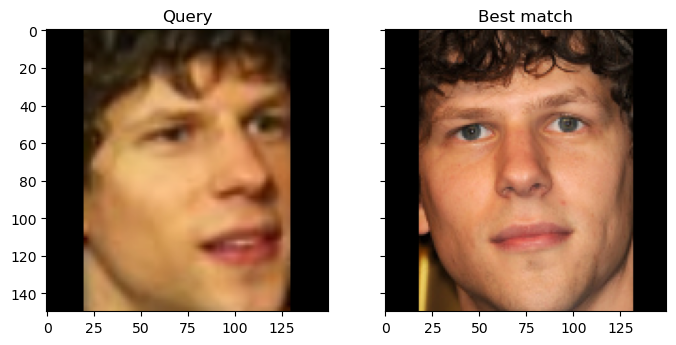

In [30]:
pca1 = PCAFeatureExtractor(5, train_X)
#THIqueryS IS A TEST FOR THE PCA
weights = pca1.transform(train_X)
# Test on out-of-sample image of existing class
query = test_X[11]

print(query.shape)
query_weight = pca1.transform(query)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=1)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (train_y[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query, cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(train_X[best_match], cmap="gray")
axes[1].set_title("Best match")
plt.show()

## Choosing the right number of components

This could be done either by testing different values and choosing the one that leads to greater accuracy or by analyzing the singular values. Each singular value indicates how much information does the corresponding eigenvector contain. From the following plot we notice that after the 5th vector the ammount of information start to decrease less rapidly so a good number of components would probably be around 5. This could be a good trade-off between number of features and accuracy.

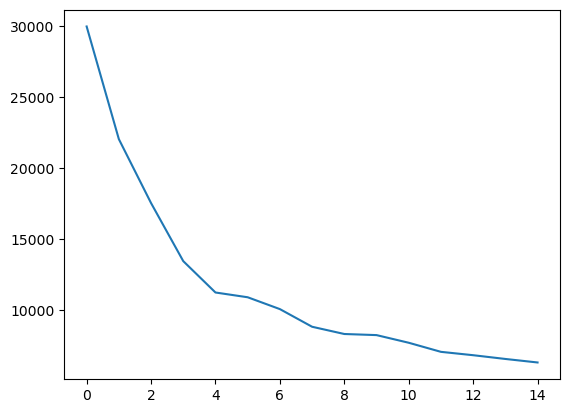

In [31]:
#plotting first 15 singular values
plt.plot(range(15), pca1.singular[:15])

### 1.2.1. Eigenface Plots

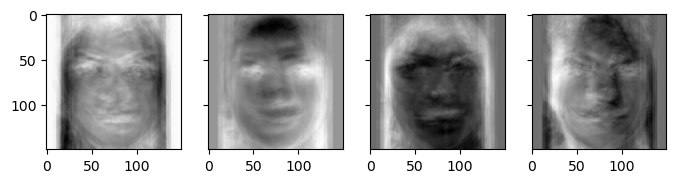

In [32]:
fig, axes = plt.subplots(1,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(4):
    axes[i].imshow(pca1.eigenfaces[i].real.reshape((150,150)), cmap="gray")
plt.show()

We can now see how we are able to reconstruct a face using the features and a certain number of eigenfaces. We notice that the face start to be distinguishable already after a small number of eigenfaces, and after a certain number adding another eigenface does not add a lot to the picture. This is because the first egienfaces are the one that "contain" more information while the last ones encapsulate small features about the image. This is the reason why we can choose to only use a certain number of eigenfaces as features to make the model less complex but still pretty accurate.

Text(0.5, 1.0, 'using 80 eigenfaces')

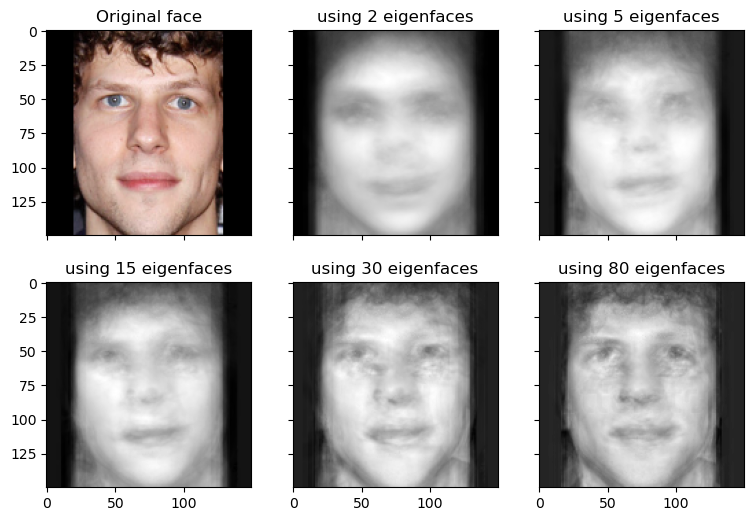

In [33]:
values = [2, 5, 15, 30, 80]
plotPCA = [PCAFeatureExtractor(i, train_X) for i in values]
query = test_X[8]
fig, axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(9,6))
axes[0][0].imshow(query, cmap="gray")
axes[0][0].set_title("Original face")
features = [plotPCA[i].transform(query) for i in range(5)]
inverse = [plotPCA[i].inverse_transform(features[i]) for i in range(5)]
axes[0][1].imshow(inverse[0].reshape((150,150)), cmap="gray")
axes[0][1].set_title("using 2 eigenfaces")
axes[0][2].imshow(inverse[1].reshape((150,150)), cmap="gray")
axes[0][2].set_title("using 5 eigenfaces")
axes[1][0].imshow(inverse[2].reshape((150,150)), cmap="gray")
axes[1][0].set_title("using 15 eigenfaces")
axes[1][1].imshow(inverse[3].reshape((150,150)), cmap="gray")
axes[1][1].set_title("using 30 eigenfaces")
axes[1][2].imshow(inverse[4].reshape((150,150)), cmap="gray")
axes[1][2].set_title("using 80 eigenfaces")

### 1.2.2. Feature Space Plots

Below the feature space plot can be observed. We can see that classes are clustered together: Jesse and Michael are close by, each near the top of the plot (Jesse clustered on the left and Michael on the right). Similarly, Sarah and Mila are also visibly in a different cluster, Mila is clustered on the bottom right while Sarah is clustered on the bottom left. This shows us that even with 2 principle components, which hold most of the varience, PCA can identify differences in test data distinctively.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

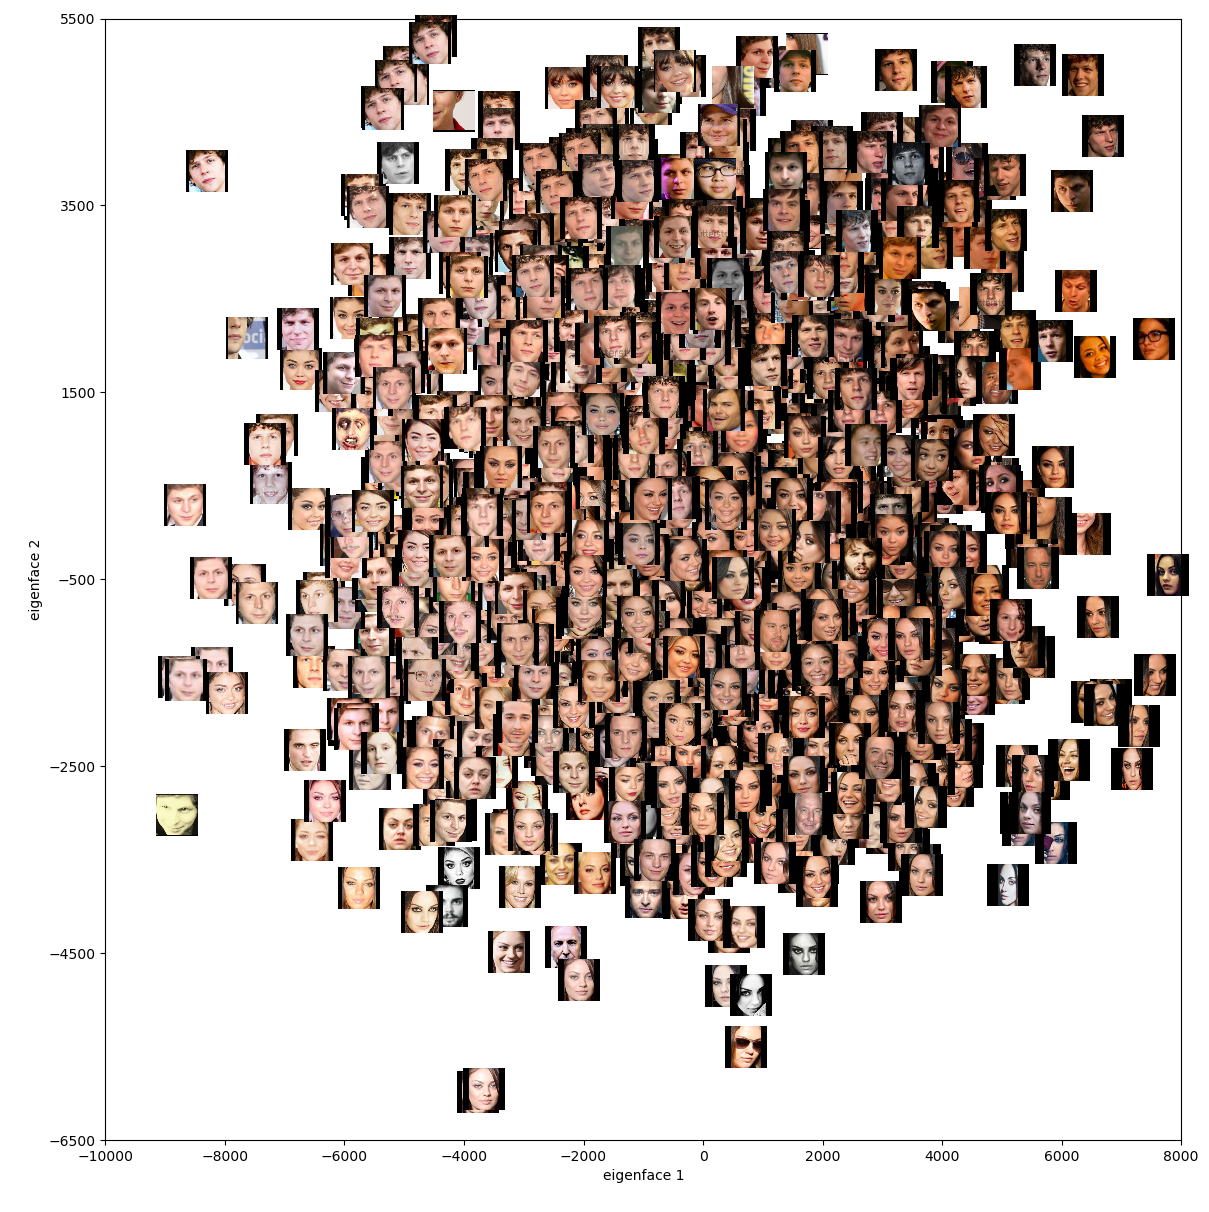

In [34]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
plt.rcParams["figure.autolayout"] = True

def getImage(path):
    return OffsetImage(test_X[path], zoom=.2)

pcaPlot = PCAFeatureExtractor(2, train_X)
coord = pcaPlot.transform(test_X)
fig, ax = plt.subplots(figsize=(12, 12))
plt.xticks(range(-10000,10000,2000))
plt.yticks(range(-6500,7000,2000))
for x0, y0, path in zip(coord[:,0], coord[:,1], [i for i in range(1816)]):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    ax.set_xlabel("eigenface 1")
    ax.set_ylabel("eigenface 2")
plt.show()


### 1.2.3. Discussion

#### PCA
PCA (Principal Component Analysis) is a technique widely used in Machine Learning to reduce the dimensionality of a dataset while retaining as much information as possible. In order to do that it transforms the original dataset into a new coordinate system in which each dimension is a linear combination of the original variables. PCA requires the dataset to be centered (the mean has to be 0). After that we compute the covariance matrix of the data and use that to extract the eigenvalues and eigenvectors. Eigenvectors represents directions in which the data varies the most, in the particular case of face detection these vectors are also called eigenfaces. By projecting a data point onto these eigenvectors we get features which are used to train a model. The eigenvalues express how much variance is “contained” in each eigenvector. The eigenvectors with more variance are also the ones that contain the more information and, hence, the ones we should use to extract important features in face recognition. This is why we usually decide to only use the first n eigenvectors (choosing n is usually a trade off between complexity and accuracy of the model).
#### SVD
In our case we found the computation of the eigenvectors to be really slow and inefficient so we decide to use SVD to reach an equivalent result. SVD (Singular Value Decomposition) is another technique used to reduce dimensionality of a dataset. This technique takes a matrix A and decompose it in three matrices U,S and V. S contains the singular values which can be seen as the eigenvalues and represent the importance of each principal component. U and V are the left and right singular vectors which can be used to transform the data into the new coordinate system (as the eigenvectors). When the matrix is centered the eigenvectors and the columns of U are equivalent.

# 2. Evaluation Metrics
## 2.0. Accuracy
As example metric we take the accuracy. Informally, accuracy is the proportion of correct predictions over the total amount of predictions. It is used a lot in classification but it certainly has its disadvantages...

In [35]:
from sklearn.metrics import accuracy_score

# 3. Classifiers

Now that we have created two different feature extraction models, its time to put these to the test! Below, we will create ***NUMBER OF CLASSIFIERS*** models to classify the images. We have tried multiple different models, for each type of classifier, and these will be mentioned in their respective sections. 

## 3.1 Support Vector Machine

Below two different SVM methods can be observed, one for SIFT and one for PCA.

### 3.1.1 SVM for SIFT

We defined two functions:

- 'kmean_bow' is used to cluster all the features into small groups. For instance, an image will have certain features that will be grouped into similar groups. [[1]](#1)

<img width="700" align="center" src="https://raw.githubusercontent.com/danilotpnta/ComputerVission/main/img/2.png" >

- 'create_features_bow' this is used to calculate the features that will be used to train our model. It calculates the minimum distance of the descriptors of one img with klusters created previously. The minimum distance then between clusters is selected to describe the features of an image.

![Features of an iamge](https://raw.githubusercontent.com/danilotpnta/ComputerVission/main/img/4.png)

It will escentially look like the img above where the x-axis is the BoW and the frequencies are the histogram that describes uniquely one image. [[2]](#2).

#### References
<a id="1">[1]</a> 
C 7.1 | Bag Of Visual Words | CNN | Object Detection | Machine learning | EvODN. Available at: https://youtu.be/1_5uuqWXuIA

<a id="2">[2]</a> 
Bag of Visual Words Model for Image Classification and Recognition. Available at: : https://kushalvyas.github.io/BOV.html


In [36]:
# Creating a Bag of Word from the descriptors
def kmean_bow(all_descriptors, num_cluster):
    bow_dict = []
    kmeans = KMeans(n_clusters = num_cluster)
    kmeans.fit(all_descriptors)
    bow_dict = kmeans.cluster_centers_

    return bow_dict

def create_kmean(all_descriptors, num_cluster):
    kmeans = KMeans(n_clusters = num_cluster)
    kmeans.fit(all_descriptors)
    return kmeans
    

# Creates features from the BoW
def create_feature_bow(image_descriptors, BoW, num_cluster):

    X_features = []

    for i in range(len(image_descriptors)):
        features = np.array([0] * num_cluster)

        if image_descriptors[i] is not None:
            '''
            Compare per each image k*descriptors with the BoW
            BoW shape: (30, 128)
            One image k*descriptors: (168, 128)
            '''
            distance = cdist(image_descriptors[i], BoW, metric='euclidean')
            
            # Along 168 distances calculated, get the min index
            argmin = np.argmin(distance, axis = 1)   
            
            for j in argmin:
                features[j] += 1
        X_features.append(features)
        
    return X_features

In [37]:
# Contains descriptors of 80 without filtering Nones
image_descriptors = sift_extractor(train_X)

# Filter Nones and flattens array to kx128 dimension
all_descriptors = sift_extractor.flatten(image_descriptors)

num_cluster = 70      
BoW = kmean_bow(all_descriptors, num_cluster = num_cluster)
kmeans = create_kmean(all_descriptors, num_cluster = num_cluster)

In [38]:
X_features = create_feature_bow(image_descriptors, BoW, num_cluster)
print(np.array(X_features).shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_features, train_y, test_size = 0.1, random_state = 1)
print("X_train shape: ", np.array(X_train).shape)
print("y_train shape: ", np.array(Y_train).shape)
print("-------------------------------")
print("X_test shape: ", np.array(X_test).shape)
print("y_test shape: ", np.array(Y_test).shape)

(80, 70)
X_train shape:  (72, 70)
y_train shape:  (72,)
-------------------------------
X_test shape:  (8, 70)
y_test shape:  (8,)


In [39]:
mlp = MLPClassifier(verbose=False, max_iter=6000)
mlp.fit(X_train, Y_train)

# clf = GridSearchCV(mlp2, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, Y_train)
mlp_better = MLPClassifier(verbose=False, max_iter=2000, activation='tanh', 
                           alpha=0.0001, hidden_layer_sizes=(50, 50, 50), 
                           learning_rate= 'constant', solver= 'adam')
mlp_better.fit(X_train, Y_train)


kNN = KNeighborsClassifier(n_neighbors = 4, p = 1)
kNN.fit(X_train,Y_train)

rndForest = RandomForestClassifier(n_estimators=75, random_state=1)
rndForest.fit(X_train,Y_train)

model_svm = SVC(random_state = 1, max_iter = 120)
model_svm.fit(X_train, Y_train)

ensemble = VotingClassifier(estimators=[
    ('mlp', mlp_better), 
    ('kNN', kNN), 
    ('model_svm', model_svm)], voting='hard')
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(50, 50, 50),
                                            max_iter=2000)),
                             ('kNN', KNeighborsClassifier(n_neighbors=4, p=1)),
                             ('model_svm', SVC(max_iter=120, random_state=1))])

In [40]:
print('"mlp" model: ')
print("score on training set params: ", mlp.score(X_train, Y_train))
print("score on testing set params: ", mlp.score(X_test, Y_test))

print('\n"mlp_better" model: ')
print("score on training set params: ", mlp_better.score(X_train, Y_train))
print("score on testing set params: ", mlp_better.score(X_test, Y_test))

print('\n"model_svm" model: ')
print("score on training set params: ", model_svm.score(X_train, Y_train))
print("score on testing set params: ", model_svm.score(X_test, Y_test))

print('\n"kNN" model: ')
print("score on training set params: ", kNN.score(X_train, Y_train))
print("score on testing set params: ", kNN.score(X_test, Y_test))

print('\n"rndForest" model: ')
print("score on training set params: ", rndForest.score(X_train, Y_train))
print("score on testing set params: ", rndForest.score(X_test, Y_test))

print('\n"model_svm" model: ')
print("score on training set params: ", model_svm.score(X_train, Y_train))
print("score on testing set params: ", model_svm.score(X_test, Y_test))

print('\n"ensemble" model: ')
print("score on training set params: ", ensemble.score(X_train, Y_train))
print("score on testing set params: ", ensemble.score(X_test, Y_test))

"mlp" model: 
score on training set params:  1.0
score on testing set params:  0.875

"mlp_better" model: 
score on training set params:  1.0
score on testing set params:  0.625

"model_svm" model: 
score on training set params:  0.9861111111111112
score on testing set params:  0.625

"kNN" model: 
score on training set params:  0.8194444444444444
score on testing set params:  0.75

"rndForest" model: 
score on training set params:  1.0
score on testing set params:  0.75

"model_svm" model: 
score on training set params:  0.9861111111111112
score on testing set params:  0.625

"ensemble" model: 
score on training set params:  0.9861111111111112
score on testing set params:  0.75


### 3.1.2 SVM for PCA

We use the radial basis function kernel for the classification. We have also tried other kernels; however, the best one seemed to be RBF. We have also combined some other SVM models together to create and ensemble model with soft voting. Although it works great on the training dataset, it is not general and hence we decided not to use it (but it is still implemented here for observation). 

In [41]:
class SVM:

    def __init__(self, ensemble=False):

        if not ensemble:
            self.model = svm.SVC(probability=True, kernel="rbf")
        
        else:
            models = list()
            models.append(('svm0', svm.SVC(probability=True, kernel="rbf")))
            models.append(('svm1', svm.SVC(probability=True, kernel='poly', degree=2)))
            models.append(('svm2', svm.SVC(probability=True, kernel='poly', degree=3)))
            models.append(('svm3', svm.SVC(probability=True, kernel='linear')))
            models.append(('svm4', svm.SVC(probability=True, kernel='poly', degree=4)))
            models.append(('svm5', svm.NuSVC(probability=True, nu=0.7, kernel='rbf')))
            models.append(('svm6', svm.NuSVC(probability=True, nu=0.5, kernel='rbf')))
            self.model = sklearn.ensemble.VotingClassifier(estimators=models, voting='soft')

    def fit(self, X, y):
        
        
        
        return self.model.fit(X, y) 
        
    def predict(self, X, probs=False):

        
        return self.model.predict_proba(X) if probs else self.model.predict(X)
    
    def __call__(self, X, probs=False):
        return self.predict(X, probs)

## 3.2. Deep Learning

Although we have very small amount of samples at hand, we wanted to try some deep learning solutions. Deep learning is known for its black-box nature, and its robustness generally depends on the amount of data that is fed into the model. There are some methods to counteract the lack of data at hand, which we utilize. One of the caveats (and also possibly advantages) is the immensly big solution space that it has. This is a caveat in our case, since finding the right hyperparameters takes many training iterations, many different models etc. There are some helpful API that help in solving this issue (KerasTuner from Keras, GridSearchCV from sklearn), which we have tried but in the end found to be inefficient (intuition is also a viable option). Below, more of these will be mentioned in depth.

### 3.2.1 Model Creation

For this classifier type, we have created two models. One of them is a compact ANN, built to be used with extracted PCA features. The other is a transfer learning solution, built to be used with the faces themselves (without prior feature extraction).

#### 3.2.1.1 Compact DL Model

Below, the first model can be observed. There are several things to consider while building a model, and these are related with the amount of data we have as well.

Important considirations that went into building this model:
>* Overfitting and Complexity: Because of the scarcity of data, any DL model that we will attempt to build is prone to overfitting (the phenomenon of the model losing generalization because it favors training data). Hence, we want a model that is not too simple, otherwise the model cannot be general, and test accuracy will fail. However, also because of the scarcity of data, we cannot attempt to build an extremly complex model, since this would result in the model not being able to extract patterns in our data, resulting in abysmal accuracy. Hence; it is a slippery slope, and there needs to be balance, both in terms of the number of units used and the amount of layers utilized.
>* Regularization: Following this discussion on overfitting, we can utilize something called regularization to get in the way of overfitting, and create a more general model. There are many ways to implement regularization, with the most popular one (and the one used in this model) being the Dopout layer. This layer randomly selects _p_ percentage of the data inputted into the layer and drops them (= 0). This helps in 2 ways: the model becomes less dependent on training data, and layers capture more distinct features.
>* Activation Function(s): Since we are doing a (multi-class) classification model, the last layer of the network has to be a softmax (although not the case here, it can also be a single unit with sigmoid if the problem at hand is a binary classification problem). The softmax function outputs probabilities for each class, and the whichever class has the maximum probability is the final prediction. For the other layers, we use an activation called Rectified Linear Unit (ReLU). ReLU is popular and practical since its gradient computation is easy, and the model can converge faster when its used. It also does not enable all neurons (if _v_ < 0, _relu(v)_ = 0), hence forward pass is also quicker. We have tried other activation functions (tanh and sigmoid), but they were sub-optimal. For future improvements, advanced activation functions such as LeakyReLU can be utilized.

In the end, we use a neural network structure that has 4 layers, with the last layer being where the classification takes place.

In [42]:
def create_compact_model(num_classes, input_shape):
    
    inputs = keras.Input(shape=input_shape)
    x = layers.LayerNormalization(axis=-1)(inputs)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes
    
    outputs =layers.Dense(units, activation=activation)(x)
    
    
    return {"model": keras.Model(inputs, outputs), 
            "num_classes": num_classes, 
            "input_shape": input_shape}

#### 3.2.1.2 Transfer Learning (with an option to fine-tune) using Xception

Below, we create our second model. With such a small dataset, trying transfer learning was a no-brainer. For this model, we also added the option to fine-tune the base model. Now lets discuss the thought process that went into this model.

Important explanations for techniques that were used, and considerations that went into building this model:
>* Transfer Learning: For some problems, similar to our case, it is more practical (and desirable, and accurate) to use an already existing model, that was trained on hefty datasets. These pre-trained models are most common in CV and NLP (famously BERT) applications. Transfer learning is one of the two approaches to using these pre-trained models. It describes freezing some or all layers of a pre-trained network, taking the top layer (which is the output layer) off and putting a smaller, untrained model on top. After that, training is done ONLY on the smaller model that has been initialized on top of the base network. This process can also be, in simplified terms, described as feature extraction. In this case, the extractor is not PCA or SIFT, but a pretrained DL model. With those features we train a smaller model, and reach an accurate model. In our case this approach was more succesful compared to fine-tuning.
>* Fine-Tuning: Similar to transfer learning, a pre-trained model is used for fine-tuning. In the case of fine-tuning, we train the base model as well. Again we take the top layer off, and put our own smaller model (or a single empty layer), but some/all layers of the base model are also trainable. However; a yet unmentioned hyperparameters, learning rate and epoch, comes in to consideration. To find an optimal solution and to avoid overfitting, fine-tuning is done with a very small learning rate (e.g. 1e-5) and epoch (e.g. 3-7). In our case, transfer learning was more succesful, and fine-tuning overfit the data pretty quickly (or did not learn accurate general patterns).
>* Overfitting, complexity and similar considerations to the previous model: Similar considerations went into developing the rest of the model, we use dropout to reduce chances of overfitting, use softmax for classification and we try to keep the model mildly complex so that our data's distinctions are recognized by the model.
>* Small snippet of data augmentation: The bulk of data augmentation will be mentioned in the DL framework that we have developed, but here we do two simple steps to generalize our training data: random contrast and gaussian noise. Additionally, we mentioned dropout, and how its a regularization method to create a more general and accurate model. GaussianNoise is another layer that can be used for a similar purpose as well.
 
We utilize Xception as our base model. Xception is trained on the ImageNet database, and is a lighter model compared to other options (e.g. VGG, which we tried and found to be sub-optimal). The features extracted from Xception are then average pooled and inputted into a 2 layer ANN.

In [43]:
# TRANSFER LEARNING - Xception, VGG16


def create_transfer_learning_model(num_classes, input_shape, fine_tune=False, augment_data=False):

    base_model = keras.applications.Xception(
    weights='imagenet',  
    input_shape=input_shape,
    include_top=False)

    base_model.trainable = fine_tune
    
    
    inputs = keras.Input(shape=input_shape)

    if augment_data:
        
        x = layers.RandomContrast(0.2)(inputs)
        x = layers.GaussianNoise(0.2)(x)
        
    else:
        x = inputs
        
    
    x = keras.applications.xception.preprocess_input(x)
    x = base_model(x, training=fine_tune)
    x = layers.GlobalAveragePooling2D()(x)
    
    if not fine_tune:
        x = layers.Dropout(0.1)(x)
        x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes
    
    outputs =layers.Dense(units, activation=activation)(x)
    
    
    return {"model": keras.Model(inputs, outputs), 
            "num_classes": num_classes, 
            "input_shape": input_shape}

### 3.2.2 Framework, Data Augmentation, Optimizers


#### Data Augmentation

To counteract the scarcity of our training samples, we use data augmentation. Data augmentation is a technique to increase training data samples by different augmentation techniques, such as rotations, shifts, flips and random brightness values. This is essential to our training, and gets in the way of the model overfitting. It helps the model learn general features, independent of rotation, flips etc. For this, we use the Keras implementation of ImageDataGenerator. Using the flow funtion of said class, we obtain a data generator that returns randomly augmented training images. Below, an example of an augmented image is given. 

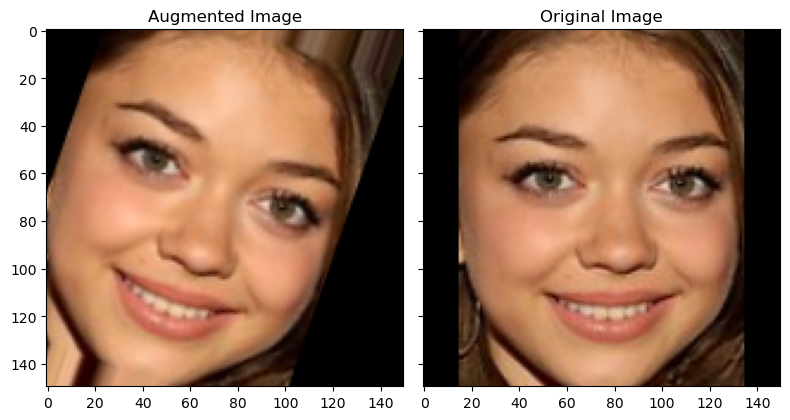

In [44]:
datagen = keras.preprocessing.image.ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1,
                horizontal_flip=True,
                brightness_range=[0.9, 1.1],
                fill_mode='nearest',
                dtype="uint8")
            
iterable = datagen.flow(x=train_X, batch_size=21, shuffle=False)  

x = next(iterable)[11]

fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(x, cmap="gray")
axes[0].set_title("Augmented Image")
axes[1].imshow(train_X[11], cmap="gray")
axes[1].set_title("Original Image")
plt.show()



Below, the deep learning model framework that we have developed can be observed. 

General remarks:
>* Categorical labels: The labels provided to us have 3 different values (0, 1, 2); however, the loss function used (and also since the output of the networks are (,3)) requires the labels to be one hot encoded. What this means is, if the label is class 2 for example, its one hot encoded represantation becomes a vector like [0, 0, 1]. There is a loss function that accepts numerical labels, but we decided to stick with categorical labels.
>* Custom Generator: This is implemented so that the feature extractors also use augmented images. 
>* Some failures: We tried early stopping, which if it worked in a successful manner wouldve been good to utilize. However, we decided to not use it in the end since our training time is not that long (we dont have a lot of data, and our models are not that complex). So early stopping was not that useful.


#### Optimizers

We have tried three different optimizers for this assignment, these are Stochastic Gradient Descent (SGD), Adam, and a new implementation of Adam called AdamW. Adam is the most popular choice in literature, because of its efficiency in converging to a solution. SGD is also another, simpler implementation of an optimizer, it finds a more optimal solution compared to Adam, but is slower and at times less accurate (because Adam has built in regularization parameters). AdamW is a different implementation of Adam that implements weight decay differently, and is popular in NLP applications. We wanted to try these three optimizers because of their popularity, and found that Adam gave us the best results for our problem.

#### Training and Prediction

For both training and prediction we use the built in _fit()_ and _predict_ methods of the Keras model respectively. 



In [45]:
class CustomGenerator(keras.utils.Sequence):
    """
    The custom generator class, which extends the Keras Sequence framework. 
    Its purpose is to use the output of image augmentation and pass it to the 
    feature constructors that we have implemented.
    """
    
    def __init__(self, iterable, fe):
        self.iterable = iterable
        self.fe = fe
        
    def __len__(self):
        return len(self.iterable)

    def __getitem__(self, idx):
        x, y = next(self.iterable)
        return self.fe(x), y
    


class DeepLearningModel:
    
    def __init__(self, model, num_classes, input_shape, feature_extractor=None):
        """
        Initializations of the built model, number of classes (for One Hot Encoding) and
        input shape (not used but just in case). If we want to apply a feature extractor, that
        is also passed as a parameter.
        """
        self.model = model
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.feature_extractor = feature_extractor
    
    def fit(self, X, y, epoch=10, lr=1e-3, batch_size=4, augment_data=False, opt="adam", val_ds=None):
        """
        The fit method of the framework, which:
            - Creates categorical labels
            - Creates a data augmentation pipeline
            - Creates an optimizer
            - Compiles the model (defines the loss, optimizer and accuracy metric)
            - Fits the training data and labels, and starts the training flow
            
        """
        
        
        y_OHE = keras.utils.to_categorical(y, num_classes = self.num_classes)
        
        if augment_data:
            
            datagen = keras.preprocessing.image.ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.05,
                height_shift_range=0.05,
                shear_range=0.05,
                zoom_range=0.05,
                horizontal_flip=True,
                brightness_range=[0.9, 1.1],
                fill_mode='nearest',
                dtype="uint8")
            
            iterable = datagen.flow(x=X, y=y_OHE, batch_size=batch_size, shuffle=True)            
            kwargs = {"x": iterable if self.feature_extractor is None else CustomGenerator(iterable, self.feature_extractor)}  # if feature extractor exists, create custom data flow
            
        else:
            kwargs = {"x": X if self.feature_extractor is None else self.feature_extractor(X), "y": y_OHE, "batch_size": batch_size, "shuffle":True}
    
        
        if opt == "adam":
            optimizer=keras.optimizers.Adam(lr=lr)
            
        if opt == "sgd":
            optimizer=keras.optimizers.SGD(lr=lr, momentum = 0.9)
            
        if opt == "adamw":
            optimizer = keras.optimizers.experimental.AdamW(learning_rate=lr, weight_decay=5e-3)

        self.model.compile( optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    
        return self.model.fit(**kwargs, epochs=epoch, validation_data=val_ds,)
    
        
    def predict(self, X, probs=False):
        """
        Predicts the incoming samples, if feature extractor exists, first the features are extracted
        from the sample and then the predictions are made.
        """
        
        if self.feature_extractor is None:
            pred = self.model.predict(X)
        else:
            feats = self.feature_extractor(X)
            pred = self.model.predict(feats)
            
        return pred if probs else np.argmax(pred, axis=-1)
    

    def __call__(self, X, probs=False):
        return self.predict(X, probs)

## 3.3 Random Forest

Below is our RandomForest framework, which uses the RandomForestClassifier class of sklearn. We did not use it in our final classifiers, but we still wanted to leave it in since we tried it.

In [46]:
class RandomForest:
    
    def __init__(self, n_estimators=100, max_depth=2):

        self.model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)

    
    def fit(self, X, y):
        
        return self.model.fit(X, y)
        
    def predict(self, X):

        
        return self.model.predict(X)
    
    def __call__(self, X):
        return self.predict(X)

## 3.4 Ensemble Model

Here, we create a simple framework for a weighted ensemble model. It uses pre-trained classifier pipelines. Each pipelines predicted provabilites are obtained and a weighted sum is obtained. Afterwards the maximum class is chosen as the predicted class. 

In [47]:
class EnsembleModel:
    
    def __init__(self, trained_models, weights):

        self.models = trained_models
        self.weights = weights
        
    def predict(self, X):
        
        preds = None
        
        for m, w in zip(self.models, self.weights):
            
            if preds is None:
                preds = w * m(X, True)
                
        
            else:
                preds += w * m(X, True)

        
        return np.argmax(preds, axis=-1)
    
    def __call__(self, X):
        return self.predict(X)

# 4. Experiments


## 4.1 Experiments with SVM

The experimentation with SVM is simple. We choose 20 principle components for PCA, and input the features into the model. Then we create the pipeline lambda function.

In [48]:
### USING SVM w/ PCA

k = 20

aX, ay = train_X, train_y

feature_extractor = PCAFeatureExtractor(k, train_X)
classifier = SVM(False)

classifier.fit(feature_extractor(aX), ay)

svm_pipeline = lambda X, p=False: classifier(feature_extractor(X), p)

## 4.2 Experiements with Deep Learning Models

The experimentation for DL models are a bit more complex, with more consideration in place. Again, overfitting and generalization is one of the biggest considerations in how we choose the following hyperparameters.

>* Epochs: A single epoch is a single fit of the entire dataset onto the model. A single run on the training dataset is not enough, since the model will not be able to capture patters that quickly; however, increasing this value greatly (to hundreds, thousands) is counter-intuitive. This will cause the model to specifically consider the training data, and will get in the way of generalization. We have tried values between 10-50, for transfer learning 30 epochs is enough, for the PCA model we have found 50 to be the best. 
>* Learning Rate: The learning rate is the parameter that defines the speed in which the network weights are learned. It is another tricky parameter: if its too big the model will overshoot the optimal point and oscillate between sub-optimal points, if its too small the model will not be able to reach the optimal point. Again, it has to have some balance, fast but steady. Below a simple reprasentation of how learning rate behaves can be observed in a 2D space [[1]](#1). For our purposes, values between $10^{-3}$ and $10^{-2}$ gave accurate results.

 <div style="text-align:center"><img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width="40%" height="40%"></div>

>* Batch Size: Batch size is another important parameter when considering generalization. A model trained with a large batch size will become a more general model. However, we do risk the model being too general (i.e. not learning patterns in training data). So again, there has to be a balanced option. In our case, 32 gave us the best results. 

There are many more hyperparameters that we could've considered (most of them are optimizer specific, such as momentum (for SGD), beta1/2 and epsilon (Adam) and finally weight decay). However, these parameters have common values among literature, and putting these parameters into consideration as well would increase the complexity of our parameter space greatly. Trying different values for the previously mentioned hyperparameters were enough to find an accurate model.


#### References
<a id="1">[1]</a> 
Setting the learning rate of your neural network. Available at: https://www.jeremyjordan.me/nn-learning-rate/

### 4.2.1 PCA with Deep Learning

In [49]:
### PCA - DEEP LEARNING
k = 30
feature_extractor = PCAFeatureExtractor(k, train_X)
# # classifier = RandomClassificationModel()

kwargs = create_compact_model(num_classes=3, input_shape=k) # we do [1:] to NOT consider the batch size in the model
print(kwargs["model"].summary())
classifier = DeepLearningModel(**kwargs, feature_extractor=feature_extractor)

# train the model on the features
classifier.fit(train_X, train_y, epoch=50, lr=5e-3, batch_size=32, augment_data=True, opt="adam")

# # model/final pipeline
pca_dl_pipeline = lambda X, p=False: classifier(X, p)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 layer_normalization (LayerN  (None, 30)               60        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                           

None


2023-04-14 15:59:23.108605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/50
3/3 [==============================] - 1s 188ms/step - loss: 1.1234 - accuracy: 0.4375
Epoch 2/50
3/3 [==============================] - 1s 181ms/step - loss: 1.1062 - accuracy: 0.4125
Epoch 3/50
3/3 [==============================] - 1s 183ms/step - loss: 1.0194 - accuracy: 0.4250
Epoch 4/50
3/3 [==============================] - 1s 188ms/step - loss: 0.9706 - accuracy: 0.5625
Epoch 5/50
3/3 [==============================] - 1s 183ms/step - loss: 0.9635 - accuracy: 0.5375
Epoch 6/50
3/3 [==============================] - 1s 189ms/step - loss: 0.9180 - accuracy: 0.6500
Epoch 7/50
3/3 [==============================] - 1s 184ms/step - loss: 0.9744 - accuracy: 0.6125
Epoch 8/50
3/3 [==============================] - 1s 185ms/step - loss: 0.8103 - accuracy: 0.6875
Epoch 9/50
3/3 [==============================] - 1s 187ms/step - loss: 0.8212 - accuracy: 0.6500
Epoch 10/50
3/3 [==============================] - 1s 191ms/step - loss: 0.7624 - accuracy: 0.7250
Epoch 11/50
3/3 [==

### 4.2.1 Transfer Learning

In [50]:
### USING ONLY THE PICTURES - TRANSFER LEARNING

kwargs = create_transfer_learning_model(num_classes=3, input_shape=train_X.shape[1:], augment_data=True) # we do [1:] to NOT consider the batch size in the model
print(kwargs["model"].summary())

classifier = DeepLearningModel(**kwargs)

# train the model on the features
classifier.fit(train_X, train_y, epoch=30, lr=2e-3, batch_size=32, augment_data=True, opt="adam")

# # model/final pipeline
tf_dl_pipeline = lambda X, p=False: classifier(X, p)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 random_contrast (RandomCont  (None, 150, 150, 3)      0         
 rast)                                                           
                                                                 
 gaussian_noise (GaussianNoi  (None, 150, 150, 3)      0         
 se)                                                             
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 150, 150, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 150, 150, 3)      0         
 bda)                                                      

None
Epoch 1/30


2023-04-14 16:00:37.760489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 3s 485ms/step - loss: 1.0848 - accuracy: 0.4875
Epoch 2/30
3/3 [==============================] - 1s 373ms/step - loss: 0.9670 - accuracy: 0.5500
Epoch 3/30
3/3 [==============================] - 1s 499ms/step - loss: 0.8534 - accuracy: 0.6500
Epoch 4/30
3/3 [==============================] - 1s 378ms/step - loss: 0.8387 - accuracy: 0.6000
Epoch 5/30
3/3 [==============================] - 1s 379ms/step - loss: 0.6599 - accuracy: 0.7250
Epoch 6/30
3/3 [==============================] - 1s 363ms/step - loss: 0.7273 - accuracy: 0.7000
Epoch 7/30
3/3 [==============================] - 1s 502ms/step - loss: 0.6201 - accuracy: 0.7875
Epoch 8/30
3/3 [==============================] - 1s 512ms/step - loss: 0.7507 - accuracy: 0.7125
Epoch 9/30
3/3 [==============================] - 1s 375ms/step - loss: 0.5592 - accuracy: 0.7375
Epoch 10/30
3/3 [==============================] - 1s 521ms/step - loss: 0.5199 - accuracy: 0.7875
Epoch 11/30
3/3 [=============

In [45]:
# em = EnsembleModel([tf_dl_pipeline, svm_pipeline], weights=[0.6, 0.4])

# 5. Publishing best results
these results have been used for a challenge

In [46]:
# evaluate performance of the model on the training set
train_y_star = tf_dl_pipeline(train_X)
print(train_y_star)

print(f"The performance on the training set is {accuracy_score(train_y, train_y_star):.2f}. This however, does not tell us much about the actual performance (generalisability).")

# predict the labels for the test set 
test_y_star = tf_dl_pipeline(test_X)

results = test.copy().drop('img', axis = 1)
results['class'] = test_y_star

results.to_csv('results.csv')

3/3 [==============================] - 1s 40ms/step
[2 2 0 2 0 1 2 0 2 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 2 1 2 1 2 2 2 2 0 2 1 1 0
 2 2 2 2 0 0 2 0 1 2 0 1 1 2 2 1 1 1 0 2 2 0 0 1 2 1 0 2 1 1 2 1 1 1 0 1 1
 2 2 0 2 2 0]
The performance on the training set is 0.95. This however, does not tell us much about the actual performance (generalisability).
57/57 [==============================] - 3s 44ms/step


# 6. Discussion

Differences between feature extraction techniques: 

PCA reduces the dimensionality of the feature space by projecting the data onto a lower-dimensional space. Histogram of Oriented Gradient & Scale Invariant Feature Transform result in a high dimensional feature vector since it extracts features from different scales and orientations
Histogram of Oriented Gradient & Scale Invariant Feature Transform features are designed to capture local patterns in an image which can be very discriminative for tasks such as object recognition and detection. PCA features are designed to capture the overall variance in the data. 
PCA can be computationally efficient, especially when the dimensionality of the input data is very high. HOG/SIFT, on the other hand, requires more computational resources due to the need to extract features at multiple scales and orientations.

PCA is mainly used for data compression, where the goal is to reduce the dimensionality of high-dimensional data while preserving most of the variability in the data. 
HOG/SIFT features are particularly well-suited for object recognition tasks, where the goal is to identify an object in an image
In summary, the choice between PCA and HOG/SIFT depends on the specific application and the characteristics of the data being analyzed. HOG/SIFT features may work better for object recognition tasks and for data that is likely to have image transformations, while PCA may be more appropriate for data compression, tasks where interpretability is important, and situations with limited computational resources.

In terms of classifiers, lets first discuss them separetly:
>* SVM, RandomForest, kNN: These methods, compared to DL models that we presented, are simpler. They are explainable and predictable. And for simple classification problems, they are efficient and work. However, they cannot pass a certain treshold in terms of test accuracy. For example, the best accuracy that we got from these models was SVM with PCA, and it was %74. This is good, but in theory DL models capture general patterns better because of their complexity.
>* Compact Deep Learning: When used with PCA, this model did output good results (although perhaps with different hyperparameters it could be better).
>* Transfer Learning: This was the best method that we were able to implement. It makes sense since it uses a pre-trained model, and we specify the last layer for our problem. For applications where small data is available, transfer learning or fine tuning become great options (along with data augmentation).

If we were to compare these models, the best one as we mentioned is Transfer Learning. Although, there is a caveat. Deep learning models, with the scarce data that we have, are not robust. For this application that is fine, but if the stakes were higher (i.e. for use in medical field, stock prediction), we would need to lean towords more robust models (such as SVM or maybe even linear models, or keep the DL model but search for more data/ methods to make the model more robust). 

The biggest challenge faced while building a DL model is choosing the hyperparameters. There are so many things to consider: layer units, # of layers, learning rate, epochs, batch size... The list goes on. Even with data augmentation, you have to consider how much you want to augment the data. If its not enough, it doesnt make a difference. If its too much then the model might not be able to capture patterns in data. This is where literature, and also intuition come in. Both are needed to perfect these models.

For future improvements, several things can be considered: 
>* Variational AutoEncoders: This is something we had researched, but because of its complexity decided to leave out. It is a model that captures training data and generates new training data according to input noise. This might help in increasing the dataset at hand.
>* Different layers: Both in terms of activation layers (LeakyRelu) and also regularizations (Instead of dropout other regularization techniques can be considered).
>* Hyperparameter Tuning using Grid Search: To find an optimal combination of hyperparameters, API such as GridSearchCV can be utilized.
